<a href="https://colab.research.google.com/github/geee05/Case-Study-Covid19/blob/main/Case_Study_on_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTING NECESSARY DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [ ]:
data=pd.read_csv('covid_19_clean_complete (11).csv',parse_dates=['Date'])

In [ ]:
data.tail(10)

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
31881,Newfoundland and Labrador,Canada,53.1355,-57.6604,2020-05-23,260,3,0,257.0,Americas
31882,Nova Scotia,Canada,44.6820,-63.7443,2020-05-23,1049,58,0,991.0,Americas
31883,Ontario,Canada,51.2538,-85.3232,2020-05-23,26560,2157,0,24403.0,Americas
31884,Prince Edward Island,Canada,46.5107,-63.4168,2020-05-23,27,0,0,27.0,Americas
31885,Quebec,Canada,52.9399,-73.5491,2020-05-23,46847,3941,0,42906.0,Americas
31886,Saskatchewan,Canada,52.9399,-106.4509,2020-05-23,630,7,0,623.0,Americas
31887,NaN,Central African Republic,6.6111,20.9394,2020-05-23,552,1,18,533.0,Africa
31888,NaN,Chad,15.4542,18.7322,2020-05-23,648,60,204,384.0,Africa
31889,NaN,Chile,-35.6751,-71.5430,2020-05-23,80287,673,26546,53068.0,Americas
31890,Anhui,China,31.8257,117.2264,2020-05-23,991,6,985,NaN,NaN


## DATA PREPROCESSING

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31891 entries, 0 to 31890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  9535 non-null   object        
 1   Country/Region  31891 non-null  object        
 2   Lat             31891 non-null  float64       
 3   Long            31891 non-null  float64       
 4   Date            31891 non-null  datetime64[ns]
 5   Confirmed       31891 non-null  int64         
 6   Deaths          31891 non-null  int64         
 7   Recovered       31891 non-null  int64         
 8   Active          31890 non-null  float64       
 9   WHO Region      31890 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.4+ MB


In [ ]:
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)

In [ ]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0.0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0.0,Africa


In [ ]:
data.tail()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
31886,Saskatchewan,Canada,52.9399,-106.4509,2020-05-23,630,7,0,623.0,Americas
31887,NaN,Central African Republic,6.6111,20.9394,2020-05-23,552,1,18,533.0,Africa
31888,NaN,Chad,15.4542,18.7322,2020-05-23,648,60,204,384.0,Africa
31889,NaN,Chile,-35.6751,-71.5430,2020-05-23,80287,673,26546,53068.0,Americas
31890,Anhui,China,31.8257,117.2264,2020-05-23,991,6,985,NaN,NaN


## DATA VISUALIZATION

In [ ]:
#To find all the cases on last value in date
top=data[data['date']==data['date'].max()]
top.head(10)

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
31842,NaN,Afghanistan,33.93911,67.709953,2020-05-23,9998,216,1040,8742.0,Eastern Mediterranean
31843,NaN,Albania,41.15330,20.168300,2020-05-23,989,31,783,175.0,Europe
31844,NaN,Algeria,28.03390,1.659600,2020-05-23,8113,592,4426,3095.0,Africa
31845,NaN,Andorra,42.50630,1.521800,2020-05-23,762,51,653,58.0,Europe
31846,NaN,Angola,-11.20270,17.873900,2020-05-23,61,4,18,39.0,Africa
31847,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-05-23,25,3,19,3.0,Americas
31848,NaN,Argentina,-38.41610,-63.616700,2020-05-23,11353,445,3530,7378.0,Americas
31849,NaN,Armenia,40.06910,45.038200,2020-05-23,6302,77,2936,3289.0,Europe
31850,Australian Capital Territory,Australia,-35.47350,149.012400,2020-05-23,107,3,104,0.0,Western Pacific
31851,New South Wales,Australia,-33.86880,151.209300,2020-05-23,3087,48,2653,386.0,Western Pacific


In [ ]:
data['date'].max()

Timestamp('2020-05-23 00:00:00')

In [ ]:
w=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()

In [ ]:
w.head(10)

,country,confirmed,active,deaths
0,Afghanistan,9998,8742.0,216
1,Albania,989,175.0,31
2,Algeria,8113,3095.0,592
3,Andorra,762,58.0,51
4,Angola,61,39.0,4
5,Antigua and Barbuda,25,3.0,3
6,Argentina,11353,7378.0,445
7,Armenia,6302,3289.0,77
8,Australia,7114,504.0,102
9,Austria,16486,810.0,639


In [ ]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000.]),
 [Text(0, -20000.0, '−20000'),
  Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000'),
  Text(0, 140000.0, '140000')])

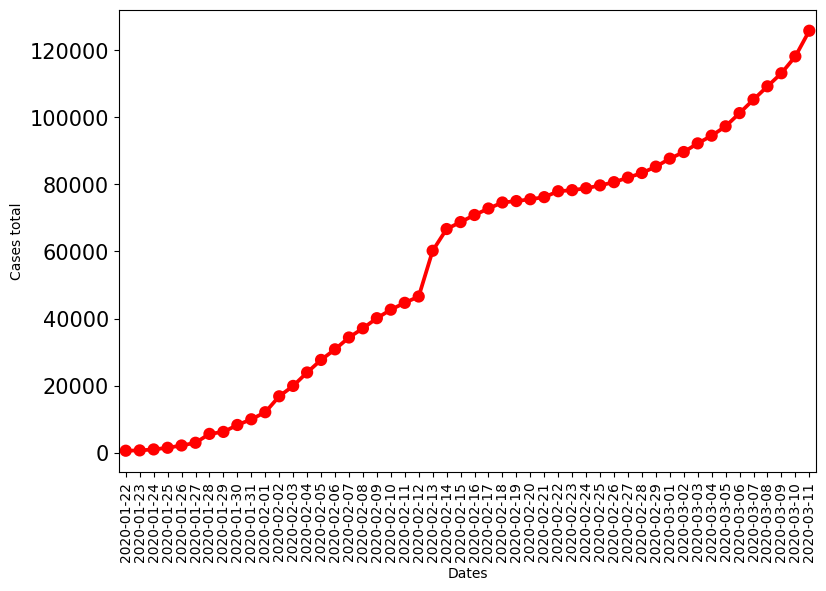

In [ ]:
#pointplot

#plot for confirmed cases

plt.figure(figsize=(9,6))
t_cases=data.groupby('date')['confirmed'].sum().reset_index()
#t_cases
t_cases['date']=pd.to_datetime(t_cases['date'])

a=sns.pointplot(x=t_cases['date'].dt.date.head(50),y=t_cases['confirmed'].head(50),color='r')
a.set(xlabel='Dates',ylabel='Cases total')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)



In [ ]:
#Top 20 countries having most active cases
t_actives=top.groupby('country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
t_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'US'),
  Text(0, 1, 'Brazil'),
  Text(0, 2, 'India'),
  Text(0, 3, 'United Kingdom'),
  Text(0, 4, 'Russia'),
  Text(0, 5, 'South Africa'),
  Text(0, 6, 'Colombia'),
  Text(0, 7, 'France'),
  Text(0, 8, 'Canada'),
  Text(0, 9, 'Peru'),
  Text(0, 10, 'Bangladesh'),
  Text(0, 11, 'Spain'),
  Text(0, 12, 'Argentina'),
  Text(0, 13, 'Sweden'),
  Text(0, 14, 'Philippines'),
  Text(0, 15, 'Egypt'),
  Text(0, 16, 'Mexico'),
  Text(0, 17, 'Netherlands'),
  Text(0, 18, 'Bolivia'),
  Text(0, 19, 'Saudi Arabia')])

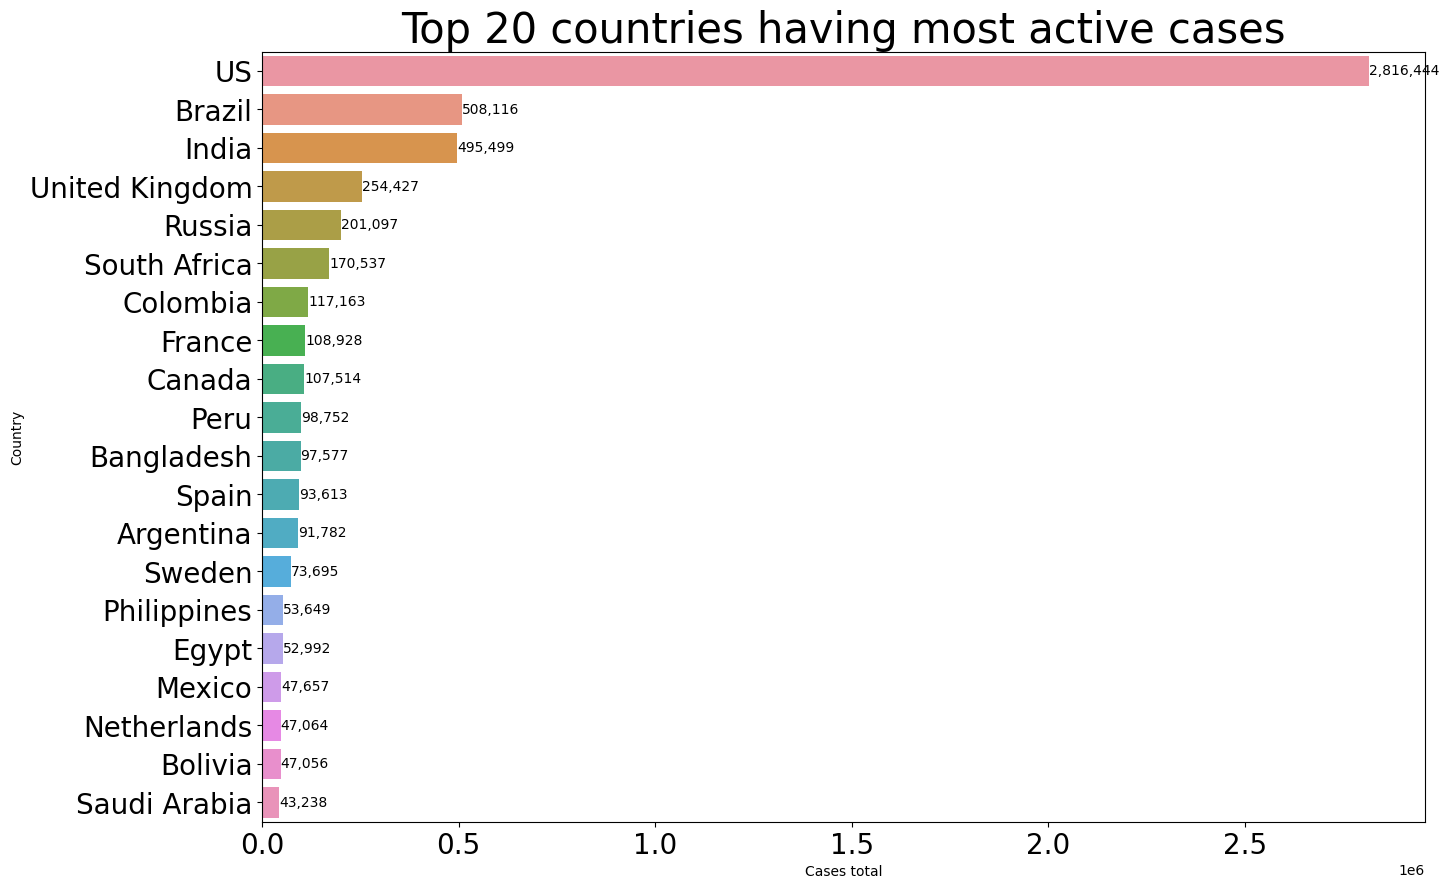

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases',fontsize=30)
a=sns.barplot(x=t_actives.active,y=t_actives.country)

#for i,j in enumerate():

for i,(value,name) in enumerate(zip(t_actives.active,t_actives.country)):
    a.text(value,i,f'{value:,.0f}',size=10,ha='left',va='center')

a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [ ]:
#Top 20 countries having most death
t_deaths=top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()
t_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'US'),
  Text(0, 1, 'Brazil'),
  Text(0, 2, 'United Kingdom'),
  Text(0, 3, 'Mexico'),
  Text(0, 4, 'Italy'),
  Text(0, 5, 'India'),
  Text(0, 6, 'France'),
  Text(0, 7, 'Spain'),
  Text(0, 8, 'Peru'),
  Text(0, 9, 'Iran'),
  Text(0, 10, 'Russia'),
  Text(0, 11, 'Belgium'),
  Text(0, 12, 'Chile'),
  Text(0, 13, 'Germany'),
  Text(0, 14, 'Canada'),
  Text(0, 15, 'Colombia'),
  Text(0, 16, 'South Africa'),
  Text(0, 17, 'Netherlands'),
  Text(0, 18, 'Pakistan'),
  Text(0, 19, 'Sweden')])

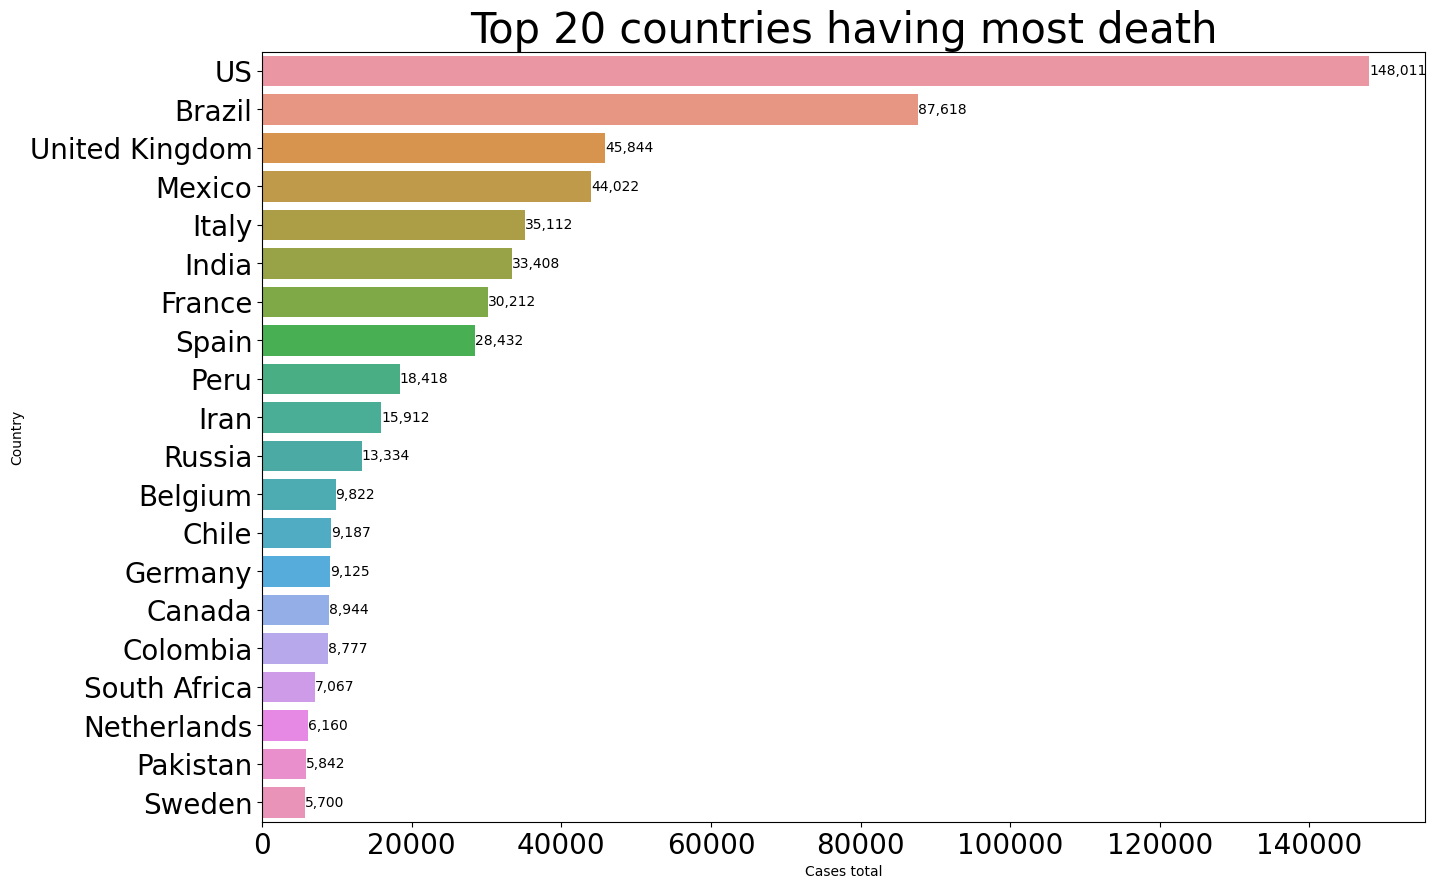

In [ ]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most death',fontsize=30)
a=sns.barplot(x=t_deaths.deaths,y=t_deaths.country)

for i,(value,name) in enumerate(zip(t_deaths.deaths,t_deaths.country)):
    a.text(value,i,f'{value:,.0f}',size=10,ha='left',va='center')

a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## DATA FORECAST

In [ ]:
pip install prophet

In [ ]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
data.groupby('date').sum().head()

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010


#### We will be analyzing 2 measures: confirmed cases and deaths 

In [ ]:
#1
confirmed = data.groupby('date').sum()['confirmed'].reset_index()
confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
#2
deaths = data.groupby('date').sum()['deaths'].reset_index()
deaths

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

In [ ]:
from fbprophet import Prophet
import pandas as pd

### Forecast on confirmed cases

In [ ]:
confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
m = Prophet() 
m.fit(confirmed) #training

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=m.make_future_dataframe(periods=7,freq='D')
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.674799e+07,1.664478e+07,1.685417e+07
191,2020-07-31,1.696338e+07,1.685802e+07,1.706943e+07
192,2020-08-01,1.717124e+07,1.706445e+07,1.727880e+07
193,2020-08-02,1.736898e+07,1.725783e+07,1.747923e+07
194,2020-08-03,1.756378e+07,1.744492e+07,1.768870e+07


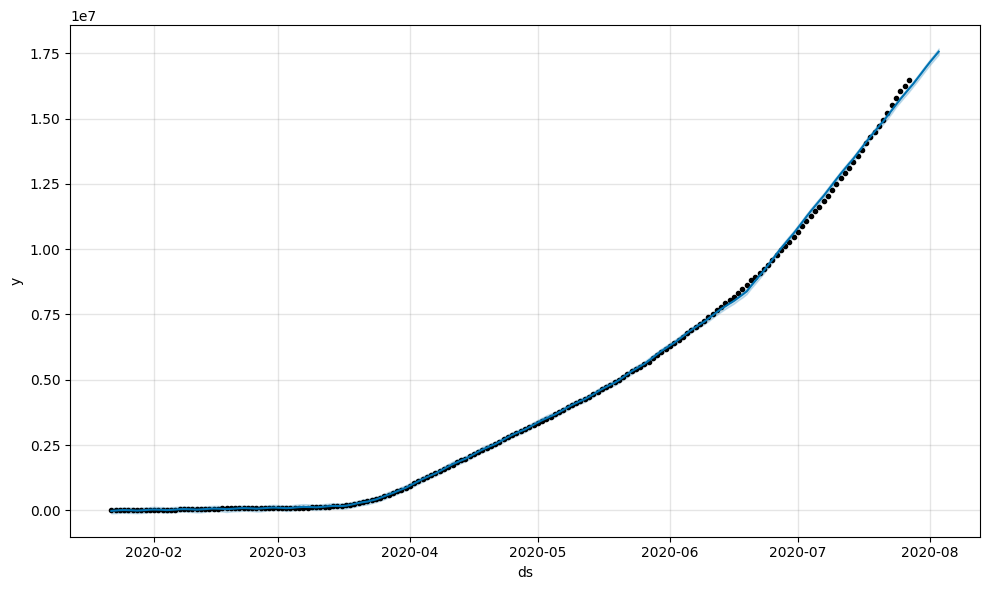

In [ ]:
#Forecasting on confirmed cases
confirmed_forecast_plot = m.plot(forecast)



************************************************************************


In [ ]:
#Forecast on Death cases

In [ ]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=14)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
197,2020-08-06
198,2020-08-07
199,2020-08-08
200,2020-08-09
201,2020-08-10


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
197,2020-08-06,698733.476780,695055.046696,703565.711270
198,2020-08-07,704250.344438,700001.130956,709775.608441
199,2020-08-08,709133.647633,704015.979683,715145.514750
200,2020-08-09,713272.003626,707222.643805,720256.395208
201,2020-08-10,717563.563343,711010.161862,725381.636111


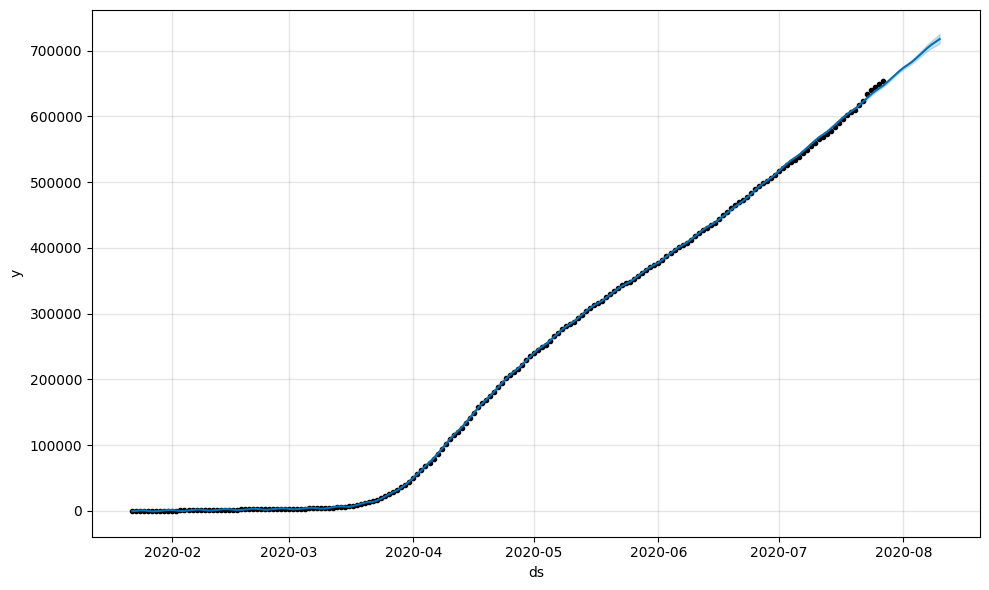

In [ ]:
deaths_forecast_plot = m.plot(forecast)